**P_Gaduel_PROJECT**


**2: Importing the neccessary python libraries and loading the data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df = pd.read_csv(r'C:\Users\pgaduel\Desktop\Gaduel_Phase3_Project\Sudan_1997-2024_Dec06.csv')
print(df.columns)

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'iso', 'region', 'country',
       'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude',
       'geo_precision', 'source', 'source_scale', 'notes', 'fatalities',
       'tags', 'timestamp'],
      dtype='object')


**3: Data inspection, cleaning and preprocessing**

In [2]:
#Inspecting the dataset

print("Shape of the data:", df.shape)
Rows,Cols=df.shape
df.head()

Shape of the data: (35057, 31)


,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,SUD31794,12/6/2024,2024,1,Political violence,Battles,Armed clash,Military Forces of Sudan (2019-),NaN,State forces,...,El Fasher,13.6264,25.3559,1,Twitter; WikiLeaks - El Fasher 'Darfur News',New media,"On 6 December 2024, SAF airstrikes targeted RS...",0,NaN,1733789073
1,SUD31815,12/6/2024,2024,1,Political violence; Demonstrations,Protests,Excessive force against protesters,Protesters (Sudan),NaN,Protesters,...,Malha,15.0934,26.1591,1,Darfur 24; WikiLeaks - El Fasher 'Darfur News',New media-Subnational,"On 6 December 2024, residents staged a protest...",1,crowd size=no report,1733789073
2,SUD31831,12/6/2024,2024,1,Political violence,Explosions/Remote violence,Air/drone strike,Military Forces of Sudan (2019-),NaN,State forces,...,Khartoum North - Shambat,15.6594,32.5300,1,Alhamish Voice; Beam reports; Emergency Lawyer...,New media-National,"On 6 December 2024, SAF airstrikes targeted a ...",5,NaN,1733789073
3,SUD31839,12/6/2024,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Sudan),NaN,Protesters,...,Sunta,11.0432,25.6139,1,Darfur 24,Subnational,"On 6 December 2024, residents staged a protest...",0,crowd size=no report,1733789073
4,SUD31842,12/6/2024,2024,2,Strategic developments,Strategic developments,Change to group/activity,Military Forces of Sudan (2019-),NaN,State forces,...,Al Sharif Wad El Obeid,14.4121,33.7298,1,Twitter,New media,Movement of forces: Around 6 December 2024 (as...,0,NaN,1733789073


In [3]:
# Selecting certain columns
selected_columns = ['year','disorder_type', 'event_type' , 'actor1', 'inter1',  'location', 'fatalities', 'actor1', 'admin1', 'geo_precision', 'source_scale']

# Creating a new DataFrame with selected columns

df_selected = df[selected_columns]

df_selected.head(20)


,year,disorder_type,event_type,actor1,inter1,location,fatalities,actor1,admin1,geo_precision,source_scale
0,2024,Political violence,Battles,Military Forces of Sudan (2019-),State forces,El Fasher,0,Military Forces of Sudan (2019-),North Darfur,1,New media
1,2024,Political violence; Demonstrations,Protests,Protesters (Sudan),Protesters,Malha,1,Protesters (Sudan),North Darfur,1,New media-Subnational
2,2024,Political violence,Explosions/Remote violence,Military Forces of Sudan (2019-),State forces,Khartoum North - Shambat,5,Military Forces of Sudan (2019-),Khartoum,1,New media-National
3,2024,Demonstrations,Protests,Protesters (Sudan),Protesters,Sunta,0,Protesters (Sudan),South Darfur,1,Subnational
4,2024,Strategic developments,Strategic developments,Military Forces of Sudan (2019-),State forces,Al Sharif Wad El Obeid,0,Military Forces of Sudan (2019-),Al Jazirah,1,New media
5,2024,Political violence,Explosions/Remote violence,Military Forces of Sudan (2019-),State forces,Um Talha,8,Military Forces of Sudan (2019-),Al Jazirah,1,International
6,2024,Strategic developments,Strategic developments,Military Forces of Sudan (2019-),State forces,Um Algura,0,Military Forces of Sudan (2019-),Al Jazirah,2,New media
7,2024,Political violence,Explosions/Remote violence,Military Forces of Sudan (2019-),State forces,Ombada,10,Military Forces of Sudan (2019-),Khartoum,1,National
8,2024,Political violence,Violence against civilians,Murle Ethnic Militia (South Sudan),Identity militia,Yuai,1,Murle Ethnic Militia (South Sudan),Jonglei,3,National
9,2024,Political violence,Battles,Unidentified Communal Militia (South Sudan),Identity militia,Cueibet,0,Unidentified Communal Militia (South Sudan),Lakes,2,National


In [4]:
print(df_selected.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35057 entries, 0 to 35056
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           35057 non-null  int64 
 1   disorder_type  35057 non-null  object
 2   event_type     35057 non-null  object
 3   actor1         35057 non-null  object
 4   inter1         35057 non-null  object
 5   location       35057 non-null  object
 6   fatalities     35057 non-null  int64 
 7   actor1         35057 non-null  object
 8   admin1         35057 non-null  object
 9   geo_precision  35057 non-null  int64 
 10  source_scale   35057 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.9+ MB
None


In [5]:
df_selected.shape

(35057, 11)

<Axes: >

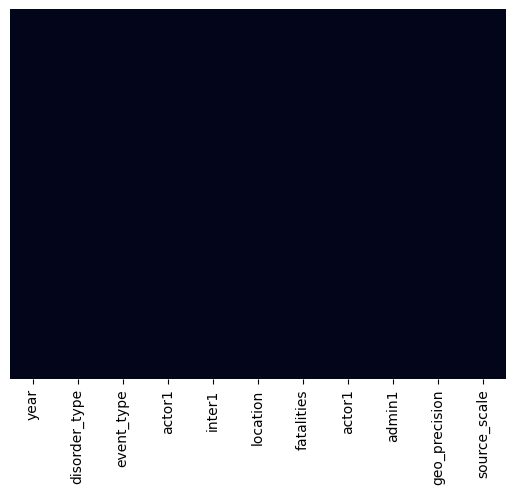

In [6]:
sns.heatmap(df_selected.isnull(), yticklabels=False, cbar=False)

## 4: Data Visualisation ##

 **Understanding the data and preparing the target Variables**

The aim of this step is to classify conflict in Sudan by type for example;  disorder_type (e.g., "Protests", "Battles", etc.) 

 *What is the most common source of violence in Sudan?*

In [7]:
print(df_selected['event_type'].value_counts())

event_type
Battles                       11282
Violence against civilians     9355
Protests                       6282
Explosions/Remote violence     4058
Strategic developments         3086
Riots                           994
Name: count, dtype: int64


In [8]:
print(df_selected['event_type'].value_counts())

event_type
Battles                       11282
Violence against civilians     9355
Protests                       6282
Explosions/Remote violence     4058
Strategic developments         3086
Riots                           994
Name: count, dtype: int64


C:\Users\pgaduel\AppData\Local\Temp\ipykernel_28128\793652818.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_counts.values, y=event_counts.index, palette='viridis')


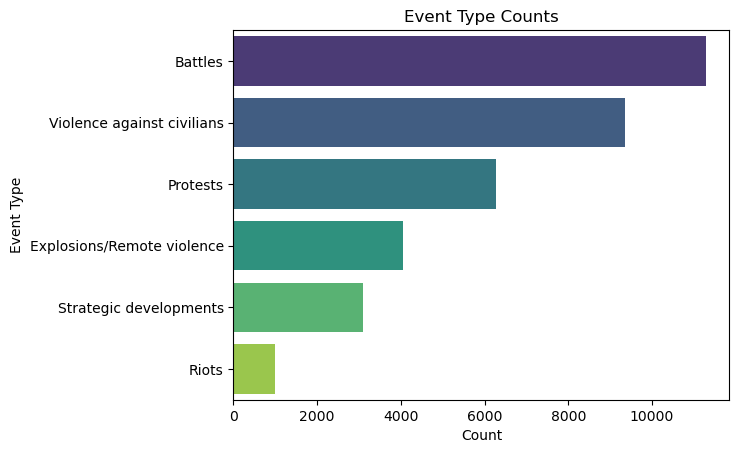

In [9]:
# Count occurrences of each 'event_type'

event_counts = df_selected['event_type'].value_counts()

# Create a barplot
sns.barplot(x=event_counts.values, y=event_counts.index, palette='viridis')

# Add titles and labels
plt.title('Event Type Counts')
plt.xlabel('Count')
plt.ylabel('Event Type')

# Display the plot
plt.show()

In [10]:
import plotly.express as px

# Calculate the value counts of event types
event_type = df_selected["event_type"].value_counts()

# Create a pie chart using Plotly
fig = px.pie(event_type, values=event_type.values, names=event_type.index, title='Total Type of Event percentage in Sudan')
# Show the plot

fig.show()

_The pie_chart shows the propportions of violent in Sudan by event percentage._

_Battles constitute the largest proportion of violence followed by violence againts civilians_

In [11]:
# Group by event_type and sub_event_type and count the occurrences
sub_event = df.groupby(["event_type", "sub_event_type"])["event_date"].agg({'count'}).reset_index()

# Create a sunburst chart using Plotly
fig = px.sunburst(sub_event, 
                  path=['event_type', 'sub_event_type'], 
                  values='count',
                  width=600, # Width of map
                  height=600)

fig.update_traces(textinfo="label+percent parent")
fig.layout.update(title="<b> Event type and Sub event type percentage in Sudan (ACLED)<b>",
                  titlefont={'color':None, 'size': 15, 'family': 'San-Serif'})

fig.show()

In [12]:
#Summary of events by actor_type1
actor_type1=df["inter1"].value_counts()
actor_type1

inter1
State forces             13484
Identity militia          6309
Protesters                6218
Political militia         4889
Rebel group               2715
Rioters                    941
External/Other forces      360
Civilians                  141
Name: count, dtype: int64

C:\Users\pgaduel\AppData\Local\Temp\ipykernel_28128\2717016390.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




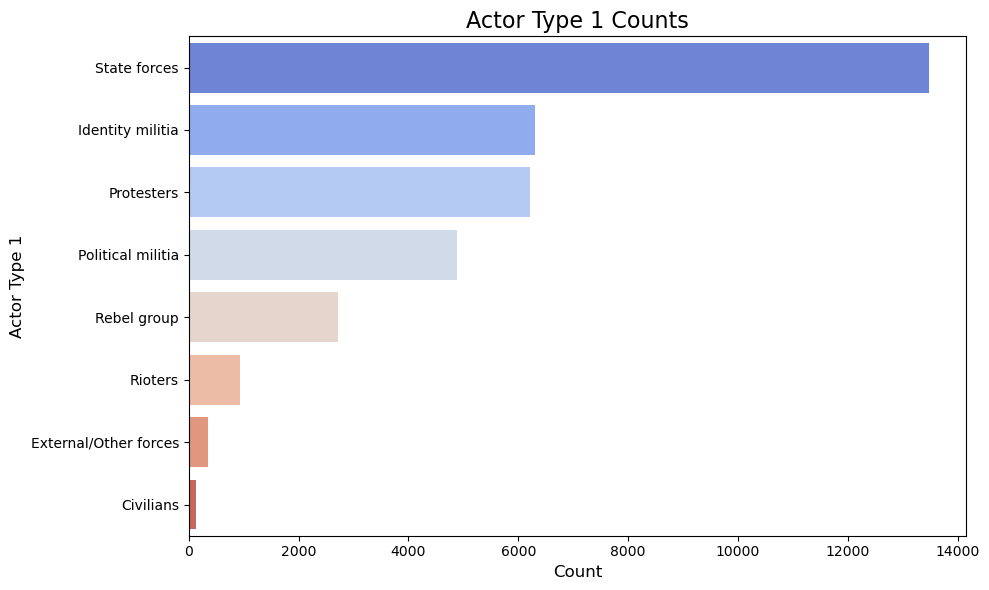

In [13]:
# Count occurrences of each 'inter1' value
actor_type1 = df["inter1"].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=actor_type1.values, y=actor_type1.index, palette='coolwarm')

# Add titles and labels
plt.title('Actor Type 1 Counts', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Actor Type 1', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [14]:
# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

# Add pie charts to subplots
fig.add_trace(go.Pie(labels=actor_type1.index, values=actor_type1, name="Actor type1"), 1, 1)
#fig.add_trace(go.Pie(labels=actor_type2.index, values=actor_type2, name="Actor type2"), 1, 2)

# Update traces to create donut-like pie charts
fig.update_traces(hole=.6, hoverinfo="label+percent+name")

# Update layout with title and annotations
fig.update_layout(
    title="<b> Actor type involved in Sudan conflict<b>",
    titlefont={'color':None, 'size': 20, 'family': 'San-Serif'},
    height=600,
    width=1000,
    annotations=[
        dict(text='<b>instigator', x=0.16, y=0.5, font_size=20, showarrow=False),
        dict(text='<b>victim/hit back', x=0.88, y=0.5, font_size=20, showarrow=False)
    ]
)

# Show the plot
fig.show()

**Based on the visualization of the instigators (Actor type1) involved in the Sudan conflict, several insights can be drawn:**

_The state forces are the main dominant actors in Sudan conflict responsible for most fatalities._


_The civilians are least perpertartors_

C:\Users\pgaduel\AppData\Local\Temp\ipykernel_28128\13868416.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




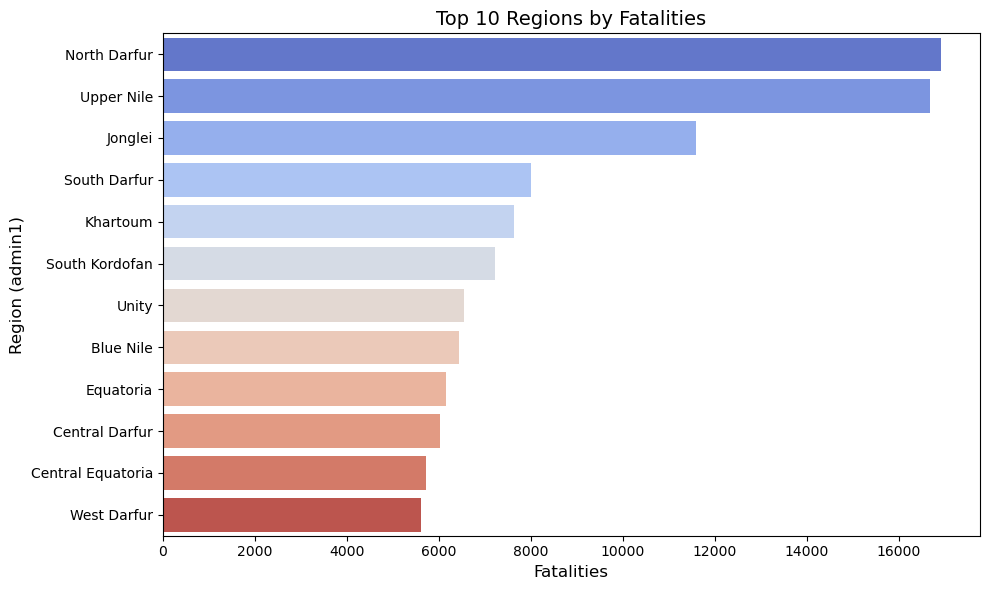

In [15]:
# Grouping by 'admin1', summing, and sorting by 'fatalities'
df_grouped = df_selected.groupby('admin1').sum().sort_values(by='fatalities', ascending=False)

# Selecting the top 10 rows
top_10 = df_grouped.head(12).reset_index()

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, x='fatalities', y='admin1', palette='coolwarm')

# Add titles and labels
plt.title('Top 10 Regions by Fatalities', fontsize=14)
plt.xlabel('Fatalities', fontsize=12)
plt.ylabel('Region (admin1)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

_There are no null or missing values in the select columns_

* Visualisation based actors, count of fatalities, and event type using filtered data for Sudan*

In [61]:
# Plot the data
plt.figure(figsize=(10,6))
for disorder in disorder_count_by_year['disorder_type'].unique():
    subset = disorder_count_by_year[disorder_count_by_year['disorder_type'] == disorder]
    plt.plot(subset['year'], subset['fatalities'], label=disorder)

plt.title('Number of Disorder Types by Year Aggregated by Fatalities in Sudan')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'disorder_count_by_year' is not defined

<Figure size 1000x600 with 0 Axes>

Sudan has been in conflict for more than three decades. The number of incidents were lower during the first two decades and rose up in the last two decades 2010, and 2020.

## Feature engineering ##

In [ ]:
# Grouping data by 'year' and aggregating
yearly_summary = (df.groupby('year').agg(total_events=('sub_event_type', 'count'),
        unique_event_types=('sub_event_type', 'nunique'),
        unique_actor
        total_fatalities=('fatalities', 'sum'),
        average_fatalities=('fatalities', 'mean')).reset_index())

# Display the yearly summary
print(yearly_summary)

    year  total_events  unique_event_types  total_fatalities  \
0   1997           219                  15              3739   
1   1998           250                  15              3946   
2   1999           212                  16              2892   
3   2000           234                  13              3305   
4   2001           224                  15              4264   
5   2002           267                  16              7722   
6   2003           167                  13              5154   
7   2004           344                  17              7692   
8   2005           239                  16              1227   
9   2006           154                  14              1085   
10  2007           113                  13              1377   
11  2008           262                  17              1327   
12  2009           267                  15              2363   
13  2010           196                  18              1596   
14  2011           332                  

<Axes: >

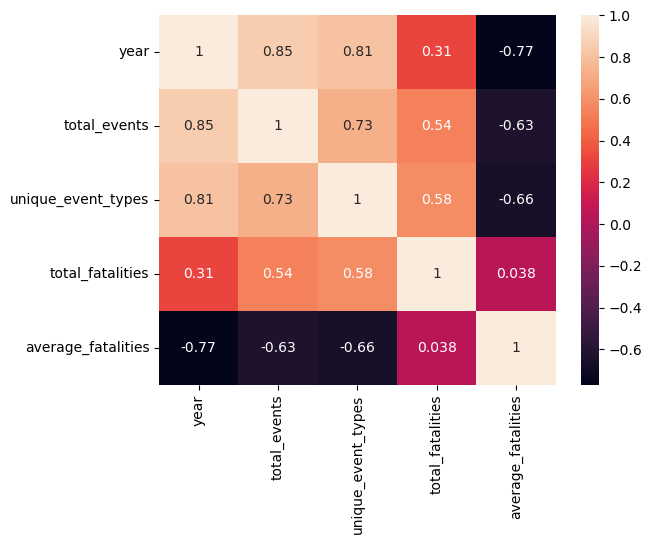

In [19]:
sns.heatmap(yearly_summary.corr(), annot =True)

Hotencoding of categorical valuesin the dataset

In [46]:
df_encoded = pd.get_dummies(df_selected)
df_encoded.head(10)

,year,fatalities,geo_precision,disorder_type_Demonstrations,disorder_type_Political violence,disorder_type_Political violence; Demonstrations,disorder_type_Strategic developments,event_type_Battles,event_type_Explosions/Remote violence,event_type_Protests,...,source_scale_Other-National,source_scale_Other-New media,source_scale_Other-Regional,source_scale_Other-Subnational,source_scale_Regional,source_scale_Regional-International,source_scale_Subnational,source_scale_Subnational-International,source_scale_Subnational-National,source_scale_Subnational-Regional
0,2024,0,1,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2024,1,1,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,2024,5,1,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,2024,0,1,True,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,2024,0,1,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,2024,8,1,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
6,2024,0,2,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,2024,10,1,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
8,2024,1,3,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,2024,0,2,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
df_encoded.shape

(35057, 4959)

In [29]:
df_encoded.columns

Index(['year', 'fatalities', 'geo_precision', 'disorder_type_Demonstrations',
       'disorder_type_Political violence',
       'disorder_type_Political violence; Demonstrations',
       'disorder_type_Strategic developments', 'event_type_Battles',
       'event_type_Explosions/Remote violence', 'event_type_Protests',
       ...
       'source_scale_Other-National', 'source_scale_Other-New media',
       'source_scale_Other-Regional', 'source_scale_Other-Subnational',
       'source_scale_Regional', 'source_scale_Regional-International',
       'source_scale_Subnational', 'source_scale_Subnational-International',
       'source_scale_Subnational-National',
       'source_scale_Subnational-Regional'],
      dtype='object', length=4959)

In [53]:
# Columns to exclude
exclude_columns = ['col1', 'col2', 'col3']

# Identify True/False columns that are not in exclude_columns
columns_to_convert = [
    col for col in df_encoded.columns 
    if col not in exclude_columns and pd.api.types.is_bool_dtype(df_encoded[col])
]

# Convert the identified columns to numeric (0/1)
df_encoded[columns_to_convert] = df_encoded[columns_to_convert].astype(int)

# Display the modified DataFrame
df_encoded

,year,fatalities,geo_precision,disorder_type_Demonstrations,disorder_type_Political violence,disorder_type_Political violence; Demonstrations,disorder_type_Strategic developments,event_type_Battles,event_type_Explosions/Remote violence,event_type_Protests,...,source_scale_Other-National,source_scale_Other-New media,source_scale_Other-Regional,source_scale_Other-Subnational,source_scale_Regional,source_scale_Regional-International,source_scale_Subnational,source_scale_Subnational-International,source_scale_Subnational-National,source_scale_Subnational-Regional
0,2024,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2024,1,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2024,5,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2024,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,2024,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35052,1997,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
35053,1997,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
35054,1997,7,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35055,1997,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# Assuming 'year' is the column containing year information
grouped_df = df_encoded.groupby('year')

# Calculate summary statistics (e.g., mean, count) for each column in each group
summary_stats = grouped_df.agg(['mean', 'count'])

summary_stats 

fatalities       geo_precision       disorder_type_Demonstrations        \
           mean count          mean count                         mean count   
year                                                                           
1997  17.073059   219      1.474886   219                     0.077626   219   
1998  15.784000   250      1.700000   250                     0.048000   250   
1999  13.641509   212      1.655660   212                     0.080189   212   
2000  14.123932   234      1.517094   234                     0.076923   234   
2001  19.035714   224      1.616071   224                     0.098214   224   
2002  28.921348   267      1.505618   267                     0.056180   267   
2003  30.862275   167      1.425150   167                     0.077844   167   
2004  22.360465   344      1.441860   344                     0.008721   344   
2005   5.133891   239      1.761506   239                     0.062762   239   
2006   7.045455   154      1.467532   154                     0.038961   154   
2007  12.185841   113      1.539823   113                     0.008850   113   
2008   5.064885   262      1.564885   262                     0.019084   262   
2009   8.850187   267      1.558052   267                     0.048689   267   
2010   8.142857   196      1.459184   196                     0.076531   196   
2011  16.262048   332      1.451807   332                     0.126506   332   
2012   7.032694   887      1.422773   887                     0.149944   887   
2013   7.892012  1352      1.348373  1352                     0.106509  1352   
2014   4.922135  2042      1.428991  2042                     0.113614  2042   
2015   3.318511  2069      1.400193  2069                     0.086032  2069   
2016   3.310710  2269      1.394006  2269                     0.085500  2269   
2017   3.014544  1994      1.460381  1994                     0.091775  1994   
2018   1.667287  1611      1.538796  1611                     0.130354  1611   
2019   1.184623  2107      1.312292  2107                     0.526815  2107   
2020   1.760788  1877      1.464038  1877                     0.328183  1877   
2021   1.539260  2407      1.425426  2407                     0.369755  2407   
2022   1.316374  3420      1.286550  3420                     0.493275  3420   
2023   2.099830  5309      1.261066  5309                     0.110190  5309   
2024   1.781715  4233      1.310418  4233                     0.023388  4233   

     disorder_type_Political violence        \
                                 mean count   
year                                          
1997                         0.872146   219   
1998                         0.928000   250   
1999                         0.896226   212   
2000                         0.905983   234   
2001                         0.879464   224   
2002                         0.932584   267   
2003                         0.892216   167   
2004                         0.947674   344   
2005                         0.903766   239   
2006                         0.902597   154   
2007                         0.938053   113   
2008                         0.908397   262   
2009                         0.928839   267   
2010                         0.882653   196   
2011                         0.822289   332   
2012                         0.786922   887   
2013                         0.830621  1352   
2014                         0.791381  2042   
2015                         0.877719  2069   
2016                         0.835170  2269   
2017                         0.812437  1994   
2018                         0.778399  1611   
2019                         0.402468  2107   
2020                         0.640384  1877   
2021                         0.567511  2407   
2022                         0.391520  3420   
2023                         0.728762  5309   
2024                         0.768249  4233   

     disorder_type_Political violence; Demonstrations        ...  

In [ ]:
sns.heatmap(summary_stats .corr(), annot =True)

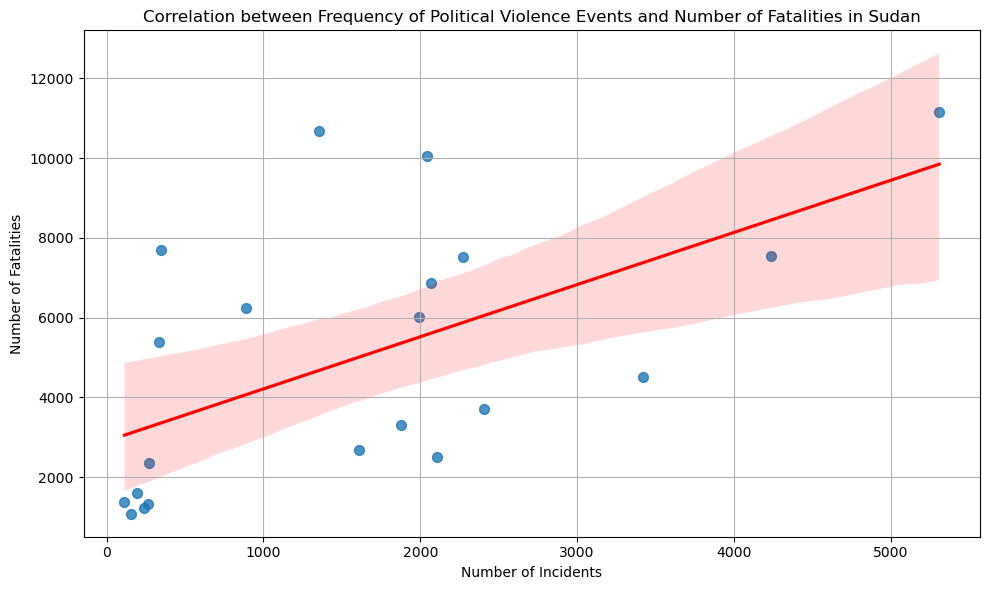

    year  fatalities  number_of_incidents
0   2004        7692                  344
1   2005        1227                  239
2   2006        1085                  154
3   2007        1377                  113
4   2008        1327                  262
5   2009        2363                  267
6   2010        1596                  196
7   2011        5399                  332
8   2012        6238                  887
9   2013       10670                 1352
10  2014       10051                 2042
11  2015        6866                 2069
12  2016        7512                 2269
13  2017        6011                 1994
14  2018        2686                 1611
15  2019        2496                 2107
16  2020        3305                 1877
17  2021        3705                 2407
18  2022        4502                 3420
19  2023       11148                 5309
20  2024        7542                 4233


In [71]:
# Convert the 'event_date' column to datetime format
df['event_date'] = pd.to_datetime(df['event_date'])

# Extract the year from the 'event_date' column
df['year'] = df['event_date'].dt.year

# Group the data by year and sum the 'fatalities' and count the number of incidents
annual_data = df.groupby('year').agg({'fatalities': 'sum', 'event_date': 'count'}).reset_index()
annual_data.rename(columns={'event_date': 'number_of_incidents'}, inplace=True)

# Create a scatter plot with a regression line to investigate the correlation
plt.figure(figsize=(10, 6))
sns.regplot(x='number_of_incidents', y='fatalities', data=annual_data, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.xlabel('Number of Incidents')
plt.ylabel('Number of Fatalities')
plt.title('Correlation between Frequency of Political Violence Events and Number of Fatalities in Sudan')
plt.grid(True)
plt.tight_layout()

# Save the plot as an image file
plt.savefig('correlation_incidents_fatalities.png')

# Show the plot
plt.show()

# Display the DataFrame
print(annual_data)

In [ ]:
# Univariate Analysis: Line Plot for Trends Over Time
plt.figure(figsize=(14, 7))
sns.lineplot(x='year', y='fatalities', data=annual_data, label='Fatalities', marker='o', color='red')
sns.lineplot(x='year', y='number_of_incidents', data=annual_data, label='Number of Incidents', marker='o', color='blue')
plt.title("Trends in Sudan Fatalities and Incidents Over Time (1997-2024)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Metrics", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Plot histograms for fatalities and number of incidents
plt.figure(figsize=(14, 6))

# Histogram for Fatalities
plt.subplot(1, 2, 1)
plt.hist(annual_data['fatalities'], bins=15, color='red', edgecolor='black', alpha=0.7)
plt.title("Distribution of Fatalities", fontsize=14)
plt.xlabel("Fatalities", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Histogram for Number of Incidents
plt.subplot(1, 2, 2)
plt.hist(annual_data['number_of_incidents'], bins=15, color='blue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Number of Incidents", fontsize=14)
plt.xlabel("Number of Incidents", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
# Create a new DataFrame with columns containing: fatalities, number_of_incidents
new_df = annual_data[['fatalities', 'number_of_incidents']].reset_index(drop=True)

# Display the new DataFrame
print(new_df)

In [ ]:
# Create a new DataFrame with columns containing: fatalities, number_of_incidents
new_df = annual_data[['fatalities', 'number_of_incidents']].reset_index(drop=True)

# Create a scatter plot with a regression line to investigate the correlation
plt.figure(figsize=(10, 6))
sns.regplot(x='number_of_incidents', y='fatalities', data=new_df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.xlabel('Number of Incidents')
plt.ylabel('Number of Fatalities')
plt.title('Correlation between Frequency of Political Violence Events and Number of Fatalities in Sudan')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Display the DataFrame
print(new_df)



**5: Multivariate Analysis**

In [ ]:
correlation = df_2.corr()
correlation

In [ ]:
#### Visualizing correlation

plt.figure(figsize=(12,7))

sns.heatmap(correlation,annot=True,cmap='crest')

_There is almost a weak correlation between variables_.

_Only Iso and latitude have strong correlation_.

**6: Statistical modelling and forecasting**

In [ ]:
#From annual data let's try to predict the future fatalities and number_of_incidents
annual_data

In [ ]:
y = annual_data['fatalities']
x = annual_data['number_of_incidents']
x

In [ ]:
sns.kdeplot(x=annual_data["fatalities"])

In [ ]:
sns.kdeplot(x=annual_data["number_of_incidents"])

## Statsmodel test

In [ ]:
import statsmodels.api as sm

y = annual_data['fatalities']
x = annual_data['number_of_incidents']

model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

print(results.summary())

_The model explains a small portion of the variance in fatalities and is not statistically significant._

_The coefficient for number_of_incidents is not significant, suggesting that it may not be a strong predictor of fatalities._

_Additionally, the diagnostics indicate potential issues with normality and autocorrelation in the residuals._

In [ ]:
#Calculating error_based Metrics

from sklearn.metrics import mean_absolute_error

y_pred = results.predict(sm.add_constant(x))
mean_absolute_error(y, y_pred)

## Feature Selcetion ##

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Assuming df is your dataset
df['year'] = pd.to_datetime(df['event_date']).dt.year

# Encoding categorical features
label_encoder = LabelEncoder()
df['inter1_encoded'] = label_encoder.fit_transform(df['inter1'])
df['disorder_type_encoded'] = label_encoder.fit_transform(df['disorder_type'])

# Aggregating fatalities by year
yearly_data = df.groupby('year').agg(
    total_fatalities=('fatalities', 'sum'),
    unique_disorder_types=('disorder_type', 'nunique')
).reset_index()

# Feature set
X = yearly_data.drop(columns=['year', 'total_fatalities'])
y = yearly_data['total_fatalities']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## Model Training ##

In [80]:
# Model Selection (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, max_depth=10)

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 14843931.931316573


# Model Prediction #